<a href="https://colab.research.google.com/github/caplove/DX_team_4_repo/blob/main/Team_4_Augment_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 가져오기**

---



In [81]:
!git clone https://github.com/caplove/DX_team_4_repo.git

fatal: destination path 'DX_team_4_repo' already exists and is not an empty directory.


In [82]:
#과제 설명
from IPython.display import Image
#Image('./image/image_01.png',width=800,height=600)

In [83]:
#Image('./image/image_02.jpg',width=800,height=700)

In [84]:
#Image('./image/image_03.jpg',width=800,height=700)

In [85]:
#Image('./image/image_05.jpg',width=800,height=700)

In [86]:
"""입출력"""
import os

"""전처리"""
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

from scipy.interpolate import CubicSpline      # for Data Augmentation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

"""시각화"""
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import seaborn as sns
#sns.set_style("white")
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore') 

## 데이터 프레임

In [87]:
# 하위 폴더내에 각각 파일이 있고, 파일(폴더)명에 class 정보가 있을경우 
# 참조 : https://wikidocs.net/39

df=[]
df = pd.DataFrame()


for (path, dir, files) in os.walk("./DX_team_4_repo/Data/"):
                
        for filename in files:
             ext = os.path.splitext(filename)[-1]  # 확장자가 txt 이면...
             if ext == '.txt':
       
                # 해당파일을 DataFrame으로 읽고 class 추가하기
                print(path + '/' + filename)

                data = pd.read_csv(path + '/'+filename,sep='[:, ,]',names=['ID','accx','accy','accz','gyrx','gyry','gyrz','current','NaN'],header=None,index_col=None)
                data = data.drop(['ID','NaN'],axis=1)     # 다수의 sep는 [ A구분자,B구분자 ] 사용
    
                #Class 컬럼추가 (파일명에서  . 앞에 문자열 추출
                class_name = filename.split('.')[0]     
                data.loc[:,'CLASS']=np.array([class_name]*len(data))    

                #모든 Class 데이터 누적 합치기
                df = pd.concat([df,data])

./DX_team_4_repo/Data//idle.txt
./DX_team_4_repo/Data//coat_1.txt
./DX_team_4_repo/Data//suit_5.txt
./DX_team_4_repo/Data//shirt_4.txt
./DX_team_4_repo/Data//suit_3.txt
./DX_team_4_repo/Data//coat_2.txt
./DX_team_4_repo/Data//coat_3.txt
./DX_team_4_repo/Data//shirt_1.txt
./DX_team_4_repo/Data//coat_5.txt
./DX_team_4_repo/Data//suit_2.txt
./DX_team_4_repo/Data//shirt_5.txt
./DX_team_4_repo/Data//coat_4.txt
./DX_team_4_repo/Data//shirt_2.txt
./DX_team_4_repo/Data//shirt_3.txt
./DX_team_4_repo/Data//suit_1.txt
./DX_team_4_repo/Data//suit_4.txt


In [88]:
df.head()

,accx,accy,accz,gyrx,gyry,gyrz,current,CLASS
0,0.0,0.0,1.0,0.18,1.04,-1.46,-0.02,idle
1,0.0,-0.0,1.0,0.24,0.98,-1.46,-0.02,idle
2,0.0,-0.0,1.0,0.06,1.04,-1.28,-0.06,idle
3,0.0,-0.0,1.0,-0.06,0.98,-1.40,-0.09,idle
4,0.0,-0.0,1.0,0.06,1.10,-1.34,0.01,idle


In [89]:
df.tail()

,accx,accy,accz,gyrx,gyry,gyrz,current,CLASS
14689,-0.01,0.07,1.05,-1.28,1.28,-1.28,-0.57,suit_4
14690,-0.00,0.02,0.86,2.44,0.98,-1.46,-0.64,suit_4
14691,-0.00,-0.04,1.11,0.12,1.04,-1.22,-0.06,suit_4
14692,0.01,0.02,0.91,-0.55,1.16,-1.40,0.94,suit_4
14693,0.01,-0.05,1.06,-0.61,1.28,-1.40,-0.06,suit_4


In [90]:
df.describe()

,accx,accy,accz,gyrx,gyry,gyrz,current
count,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000
mean,-0.000210,-0.000524,0.998872,0.263806,1.062795,-1.314019,0.084912
std,0.018129,0.035233,0.059794,1.455410,0.179769,0.192238,0.619515
min,-0.180000,-0.190000,0.570000,-15.630000,0.060000,-2.140000,-3.630000
25%,-0.010000,-0.020000,0.970000,-0.550000,0.980000,-1.400000,-0.480000
50%,0.000000,-0.000000,1.000000,0.240000,1.040000,-1.280000,0.070000
75%,0.010000,0.020000,1.030000,1.040000,1.160000,-1.220000,0.650000
max,0.140000,0.220000,1.440000,15.560000,2.320000,-0.430000,1.810000


## x,y 정의

In [91]:
""" 설명 변수 및 반응변수 구분 """
x = df.drop(['CLASS'],axis=1)
y = df['CLASS']

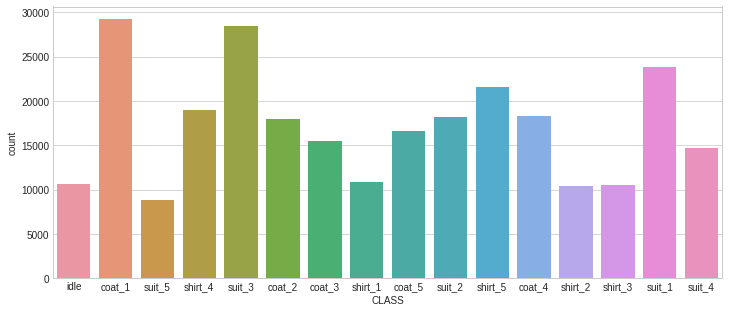

In [92]:
"""분포 확인"""
plt.figure(figsize=(12, 5))
sns.countplot(y)           # 돗수분포
plt.show()

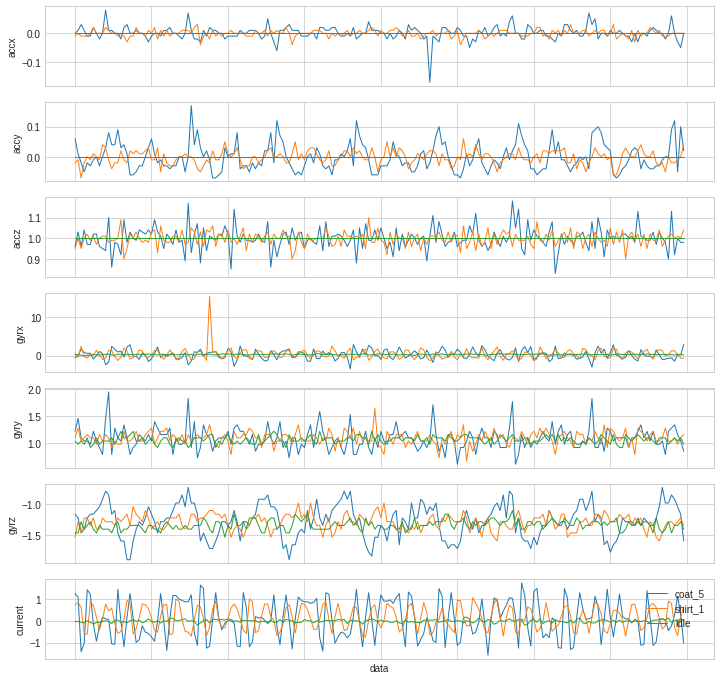

In [93]:
"""데이터 확인"""
# 몇 개의 Class에 대하여, 맨 앞 1초간 데이터 관찰

class_list=['coat_5','shirt_1','idle']
sensor_list=['accx','accy','accz','gyrx','gyry','gyrz','current']
data_length=200       # 2초  @ 10ms sampling

plt.figure(figsize=(12,12))

for i in class_list:
    idx_class = df[df.CLASS == i]

    for j in sensor_list:
        idx_j = sensor_list.index(j)    # j의 위치를 찾아 subplot의 위치를 정함.
        plt.subplot(7,1,idx_j+1)
        plt.plot(idx_class[j][0:data_length],label=i,linewidth=1)
        plt.ylabel(j)
        plt.xticks(visible=False)
    
plt.xlabel('data')
plt.legend(loc='upper right')
plt.show()

In [94]:
#Image('./image/image_06.jpg')

# **전처리**

---





>## Scaler 

In [95]:
"""전처리 / 데이터 증강 """
#Image('./image/image_08.jpg',width=800, height=400)
# jittering, Scaling, Rotation,Permutation,Magnitude Warping,TimeWarp,Cropping ... 

'전처리 / 데이터 증강 '

>## Data Augmentation


>>>### *jittering*

In [96]:
"""jittering"""
sigma = 0.005

def DA_Jitter(X, sigma=0.05):
    myNoise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X+myNoise


#x_in=x.loc[:,'accx':'accz']    # array에서 slicing 은. 
#x_in=x.iloc[:,0:3]             # pd DataFrame에서 slicing은 .loc(인덱스기반) 또는 .iloc(위치기반) 써야함.
#print(x.shape,x_in.shape)

# x 전체 데이터에 jittering
x_in_jittering = DA_Jitter(x,sigma)

# x,y merge
#x_in=pd.concat([x,x_in_jittering],axis=0)
#y_in=pd.concat([y,y],axis=0)
#print(x.shape,x_in.shape,y.shape,y_in.shape)

# fig = plt.figure(figsize=(15,4))
# for ii in range(8):
#     ax = fig.add_subplot(2,4,ii+1)
#     ax.plot(DA_Jitter(x_in,sigma))
#     ax.set_xlim([0,100])
#     ax.set_ylim([-5,5])


>>>### *Magnitude Warping*

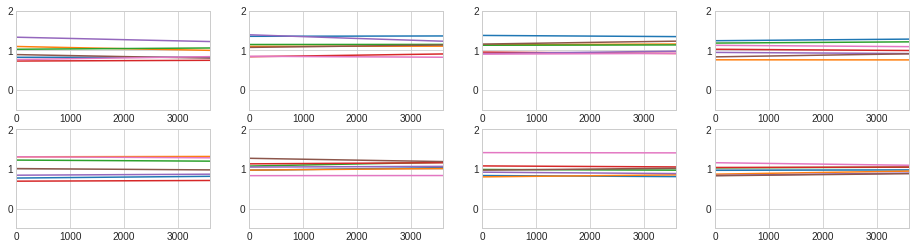

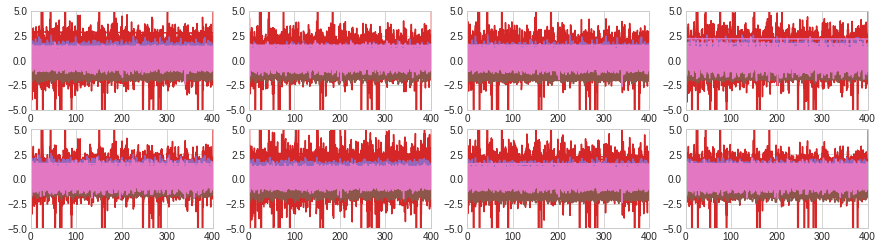

In [97]:
"""Magnitude Warping"""
sigma = 0.2  # default 0.2  (standard deviation)
knot = 4      # default 4   (should be integer)

## This example using cubic splice is not the best approach to generate random curves. 
## You can use other aprroaches, e.g., Gaussian process regression, Bezier curve, etc.
def GenerateRandomCurves(X, sigma=0.2, knot=4):
    xx = (np.ones((X.shape[1],1))*(np.arange(0,X.shape[0], (X.shape[0]-1)/(knot+1)))).transpose()
    yy = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, X.shape[1]))
    x_range = np.arange(X.shape[0])
    cs_x = CubicSpline(xx[:,0], yy[:,0])
    cs_y = CubicSpline(xx[:,1], yy[:,1])
    cs_z = CubicSpline(xx[:,2], yy[:,2])
    cs_a = CubicSpline(xx[:,3], yy[:,3])  # 추가
    cs_b = CubicSpline(xx[:,4], yy[:,4])  # 추가
    cs_c = CubicSpline(xx[:,5], yy[:,5])  # 추가
    cs_i = CubicSpline(xx[:,6], yy[:,6])  # 추가
    
    #return np.array([cs_x(x_range),cs_y(x_range),cs_z(x_range)]).transpose()
    return np.array([cs_x(x_range),cs_y(x_range),cs_z(x_range),cs_a(x_range),cs_b(x_range),cs_c(x_range),cs_i(x_range)]).transpose()



## Random curves around 1.0
fig = plt.figure(figsize=(16,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
#    ax.plot(GenerateRandomCurves(x.iloc[:,0:3], sigma))
    ax.plot(GenerateRandomCurves(x, sigma))

    plt.axis([0,3600,-0.5,2])

def DA_MagWarp(X, sigma):
    return X * GenerateRandomCurves(X, sigma)

fig = plt.figure(figsize=(15,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
#    ax.plot(DA_MagWarp(x.iloc[:,0:3], sigma))
    ax.plot(DA_MagWarp(x,sigma))

    ax.set_xlim([0,400])
    ax.set_ylim([-5,5])    
    

In [98]:
# x 전체 데이터에 Magnitude Warp
x_in_MagWarp = DA_MagWarp(x,sigma)


In [99]:
#x,y merge
# x=pd.concat([x,x_in_jittering,x_in_MagWarp],axis=0)
# y=pd.concat([y,y,y],axis=0)
#print(x.shape,x_in.shape,y.shape,y_in.shape)
print(x.shape, x_in_jittering.shape, x_in_MagWarp.shape,y.shape)

(274582, 7) (274582, 7) (274582, 7) (274582,)


# **특징추출**
---

>>## MFCC

In [100]:
"""전처리 / 특징 추출 """
"""MFCC"""
#Image('./image/image_09.jpg', width=400, height=100)   # https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=sooftware&logNo=221661644808

'MFCC'

In [101]:
"""library"""
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

"""변수정의"""
fs=100
no_of_data=400
class_list=np.array(['idle', 'suit_1','suit_2','suit_3','suit_4','suit_5','shirt_1','shirt_2','shirt_3',
            'shirt_4','shirt_5','coat_1','coat_2','coat_3','coat_4','coat_5'])

features_all=pd.DataFrame()

"""함수정의"""
# list 들어오면, n개씩 쪼개서 return   https://jsikim1.tistory.com/141
def list_chunk(lst,n):
    return [lst[i:i+n] for i in range(0,len(lst),n)], len(lst)//n      #  // 몫


In [102]:
"""Augmentation 포함 특징추출"""
x_list=[x, x_in_jittering, x_in_MagWarp]

#class_list=np.array(['coat_5','shirt_1'])
class_list=np.array(['idle', 'suit_1','suit_2','suit_3','suit_4','suit_5','shirt_1','shirt_2','shirt_3',
            'shirt_4','shirt_5','coat_1','coat_2','coat_3','coat_4','coat_5'])
features_all=pd.DataFrame()

for ii in x_list:
# 각 class별로 n개씩 묶어서(chunk) -->  mfcc -->  merge 함.

# chunk
    for i in class_list:       # class별로 'idle', 'suit1', ....
        idx_class = y == i
        x_in, count = list_chunk(ii['accx'][idx_class],no_of_data)   # x 400ea
        y_in, count = list_chunk(ii['accy'][idx_class],no_of_data)   # y 400ea
        z_in, count = list_chunk(ii['accz'][idx_class],no_of_data)   # z 400ea
        current_in, count = list_chunk(ii['current'][idx_class],no_of_data)   # current 400ea 
        class_in,count = list_chunk(y[idx_class],no_of_data)   # label
        print("class:", i, "    chunk개수:",count)  # class별 chunked 개수 확인
    
# mfcc & merge
        for j in range(0,count-1):    # 클래스 내의 j번째 chunk
            # mfcc
            x_in_chunk = np.array(x_in[j])
            y_in_chunk = np.array(y_in[j])
            z_in_chunk = np.array(z_in[j])
            current_in_chunk = np.array(current_in[j])
            #print(x_in_chunk.shape)            # (400,)
            mfccs_x_chunk = librosa.feature.mfcc(x_in_chunk, sr=fs, n_mfcc=13)
            mfccs_y_chunk = librosa.feature.mfcc(y_in_chunk, sr=fs, n_mfcc=13)
            mfccs_z_chunk = librosa.feature.mfcc(z_in_chunk, sr=fs, n_mfcc=13)
            mfccs_current_chunk = librosa.feature.mfcc(current_in_chunk, sr=fs, n_mfcc=13)
            #print(x_in_chunk.shape, mfccs_x_chunk.shape)         # (13,1)
 
            # class
            class_in_chunk = class_in[0]
 
            # features merge
            features_chunk = np.concatenate((mfccs_x_chunk,mfccs_y_chunk,mfccs_y_chunk,mfccs_current_chunk),axis=0)
        
            #features + class
            features_chunk = pd.DataFrame(features_chunk).T
            features_chunk['class']=class_in_chunk
            #features_chunk['class']=class_location
        
            #print(features_chunk.head())
            features_all = pd.concat([features_all,features_chunk],axis=0)

class: idle     chunk개수: 26
class: suit_1     chunk개수: 59
class: suit_2     chunk개수: 45
class: suit_3     chunk개수: 71
class: suit_4     chunk개수: 36
class: suit_5     chunk개수: 22
class: shirt_1     chunk개수: 27
class: shirt_2     chunk개수: 25
class: shirt_3     chunk개수: 26
class: shirt_4     chunk개수: 47
class: shirt_5     chunk개수: 53
class: coat_1     chunk개수: 73
class: coat_2     chunk개수: 44
class: coat_3     chunk개수: 38
class: coat_4     chunk개수: 45
class: coat_5     chunk개수: 41
class: idle     chunk개수: 26
class: suit_1     chunk개수: 59
class: suit_2     chunk개수: 45
class: suit_3     chunk개수: 71
class: suit_4     chunk개수: 36
class: suit_5     chunk개수: 22
class: shirt_1     chunk개수: 27
class: shirt_2     chunk개수: 25
class: shirt_3     chunk개수: 26
class: shirt_4     chunk개수: 47
class: shirt_5     chunk개수: 53
class: coat_1     chunk개수: 73
class: coat_2     chunk개수: 44
class: coat_3     chunk개수: 38
class: coat_4     chunk개수: 45
class: coat_5     chunk개수: 41
class: idle     chunk개수: 26
class:

In [103]:
"""전처리 후 데이터 구조"""
features_all.shape

(1986, 53)

In [104]:
features_all.head()   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,class
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201.391341,0.925284,-4.041210,7.387525,1.751451,0.090655,0.394997,1.490920,2.452048,-4.733238,3.687767,0.847616,3.709894,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.739337,2.944957,0.142026,-0.573331,1.535497,-3.454344,-7.073645,-2.805138,-1.876212,-2.081281,-6.421273,1.218584,0.310433,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.218297,1.315889,5.813116,-5.363791,-6.252804,-2.776524,-2.444918,0.976442,3.285535,-0.567978,-2.320336,-0.079556,5.451989,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.913445,1.792793,-1.025874,-3.227174,-7.178538,3.415736,-5.713125,-3.127864,1.936888,4.775039,-2.434643,3.841988,2.972255,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.336192,-5.578025,-3.158794,-1.916322,-3.194026,-7.659798,-5.715364,0.557323,6.521582,6.264885,-7.649926,3.726388,4.487350,idle


In [105]:
features_all.tail()   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,class
0,44.794576,11.531117,8.112973,-0.820210,1.482368,-7.760639,-3.201041,-0.907458,1.093198,2.220080,-4.238934,2.564587,1.017487,116.638445,4.699068,12.648706,6.839701,-2.756884,-3.266937,-4.791783,-4.509351,-2.442049,-4.237951,-1.210688,-8.481175,-3.286782,116.638445,4.699068,12.648706,6.839701,-2.756884,-3.266937,-4.791783,-4.509351,-2.442049,-4.237951,-1.210688,-8.481175,-3.286782,388.722141,24.161418,-5.505935,8.150111,15.697994,6.194727,-7.753172,-8.991975,-3.654240,12.264525,8.462349,-10.716048,-19.045673,coat_5
0,49.262442,7.018879,17.044212,-2.431265,-4.739011,-6.194967,-3.083666,-0.862925,0.945103,3.474902,-4.668826,4.257290,2.326177,110.163577,5.979441,10.355038,5.452875,-2.031056,-5.213730,-8.245531,-10.950616,-9.458271,-4.684389,-2.405521,-3.915124,-7.784276,110.163577,5.979441,10.355038,5.452875,-2.031056,-5.213730,-8.245531,-10.950616,-9.458271,-4.684389,-2.405521,-3.915124,-7.784276,391.599365,23.899479,-15.801266,4.298670,18.046513,3.383153,0.498291,-4.944267,-0.636055,5.762887,4.039446,-12.333277,-18.723698,coat_5
0,38.709282,8.428013,1.547800,-1.349242,-3.854416,-7.349673,-4.970460,-0.815768,-1.759442,-5.582498,3.050184,2.999891,-3.166744,105.298525,2.910596,16.397130,-3.754156,-5.807299,-3.363935,-5.372857,-7.054501,-8.397421,-0.468504,0.076679,-8.685145,-1.531857,105.298525,2.910596,16.397130,-3.754156,-5.807299,-3.363935,-5.372857,-7.054501,-8.397421,-0.468504,0.076679,-8.685145,-1.531857,392.927549,26.053811,-10.313944,2.960724,17.764640,-0.666631,-6.613175,-6.389603,-9.410530,11.326290,3.574103,-17.615579,-15.120212,coat_5
0,48.422423,5.458749,2.071728,-3.031516,-3.653673,-2.159159,-4.919362,-2.215200,-1.867124,4.791671,3.480443,3.339667,3.096304,121.041312,6.604523,4.701106,6.505615,-2.839212,-5.170003,-5.126371,-13.315311,-9.115527,-8.692184,4.162696,-4.805305,-2.787051,121.041312,6.604523,4.701106,6.505615,-2.839212,-5.170003,-5.126371,-13.315311,-9.115527,-8.692184,4.162696,-4.805305,-2.787051,385.622034,23.059199,-10.043011,3.894120,14.179044,-3.516695,-10.542750,-1.222575,0.605351,6.829329,0.157096,-3.872029,-11.528114,coat_5
0,58.049809,-4.964600,4.255254,2.459000,-2.945813,-6.646509,-6.117982,-2.980125,-3.495566,1.999877,-0.371494,1.970478,1.543306,105.317809,4.067401,12.340510,8.875398,1.828032,3.001512,0.732419,-8.461202,-4.592694,2.943748,-1.487067,-1.757348,-19.284891,105.317809,4.067401,12.340510,8.875398,1.828032,3.001512,0.732419,-8.461202,-4.592694,2.943748,-1.487067,-1.757348,-19.284891,395.012559,14.073744,-16.889030,4.745221,13.995778,2.138286,-9.966719,-1.533214,-4.342749,2.424985,3.987630,-11.286706,-14.953541,coat_5


In [106]:
features_all.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,21.388584,1.204277,2.358066,-0.136710,-3.145506,-4.204449,-3.542211,-3.529706,-2.150256,-0.130252,1.734044,1.364723,0.253686,58.532159,1.695063,5.531035,0.900994,-3.263397,1.896420,-6.251411,-8.418213,-5.379284,-0.443162,1.241936,-2.699850,-3.431082,58.532159,1.695063,5.531035,0.900994,-3.263397,1.896420,-6.251411,-8.418213,-5.379284,-0.443162,1.241936,-2.699850,-3.431082,351.275679,32.476757,-14.294186,-12.721831,-3.648284,2.403242,-0.398378,-0.509250,2.712940,1.537908,-4.472948,-5.786574,-4.092465
std,188.139524,7.380571,4.850377,4.232315,3.992623,4.306625,3.508601,3.666174,3.444701,3.772372,3.870945,3.407661,3.875153,194.408599,5.905476,4.349987,4.196164,4.131892,5.795613,3.806106,3.512862,3.418869,3.538200,3.835632,3.975729,3.925475,194.408599,5.905476,4.349987,4.196164,4.131892,5.795613,3.806106,3.512862,3.418869,3.538200,3.835632,3.975729,3.925475,35.359318,9.002196,8.371316,10.111487,9.265847,5.260178,6.121052,4.222839,4.657599,7.024251,6.559474,7.410211,9.180738
min,-1131.370850,-19.945587,-12.812237,-18.705369,-16.149565,-21.187422,-15.801435,-15.626307,-13.052500,-13.129171,-9.356888,-10.264216,-12.460033,-1131.370850,-20.825774,-10.956083,-13.793368,-17.403392,-14.975793,-20.388093,-20.031136,-15.881617,-13.521306,-10.651726,-13.972114,-20.359282,-1131.370850,-20.825774,-10.956083,-13.793368,-17.403392,-14.975793,-20.388093,-20.031136,-15.881617,-13.521306,-10.651726,-13.972114,-20.359282,194.885693,-7.476166,-43.603940,-33.389164,-28.751441,-17.749917,-18.602170,-11.851236,-11.714078,-18.875637,-20.515719,-24.820122,-24.631855
25%,28.361739,-4.033388,-0.824037,-2.917913,-5.773997,-6.777977,-5.854667,-6.008146,-4.543558,-2.514105,-0.660772,-1.022777,-2.251277,63.159808,-1.878999,2.437877,-1.770784,-5.848189,-2.595127,-8.694742,-10.719734,-7.829505,-2.877902,-1.209867,-5.511758,-6.099380,63.159808,-1.878999,2.437877,-1.770784,-5.848189,-2.595127,-8.694742,-10.719734,-7.829505,-2.877902,-1.209867,-5.511758,-6.099380,336.748529,28.333967,-18.903636,-20.499625,-9.835763,-0.668244,-4.685038,-3.475776,-0.593140,-3.649219,-9.643899,-11.059817,-11.879983
50%,50.809864,0.257787,2.292494,0.000000,-3.207076,-4.141113,-3.514809,-3.490433,-2.048314,-0.031939,1.571217,1.287277,0.317458,91.626208,1.543303,5.221973,0.998861,-3.292156,1.941135,-6.290563,-8.480454,-5.393957,-0.422111,1.097271,-2.712972,-3.781515,91.626208,1.543303,5.221973,0.998861,-3.292156,1.941135,-6.290563,-8.480454,-5.393957,-0.422111,1.097271,-2.712972,-3.781515,354.391862,33.741229,-13.621239,-14.449860,-5.377148,2.499317,0.087068,-0.790139,2.604972,1.758168,-5.118526,-6.457271,-3.614300
75%,75.099729,5.864084,5.798962,2.692166,-0.459855,-1.300882,-0.974363,-1.045158,0.000000,2.452471,4.102662,3.653119,2.773422,110.974606,5.300188,8.399045,3.769319,-0.491599,6.240574,-4.036409,-6.405341,-2.939442,2.090581,3.901958,0.000000,-0.579489,110.974606,5.300188,8.399045,3.769319,-0.491599,6.240574,-4.036409,-6.405341,-2.939442,2.090581,3.901958,0.000000,-0.579489,374.135510,38.222781,-8.974565,-5.924500,1.177816,5.575419,3.735805,2.198339,5.802155,6.272321,0.449761,-0.647373,3.620038
max,113.458331,25.973796,17.044212,12.413163,11.901835,8.651456,7.867493,10.242824,9.968561,11.301675,15.157634,12.84004

# **모형 설계/훈련/평가**
---

>>>### x,y 정의 (features 기반)

>>## DNN

In [107]:
"""x,y 정의"""
x=features_all.drop('class',axis=1)
y=features_all['class']

"""class를 숫자로 변환 for pytorch"""
y_number=[]
for i in y:
    y_tmp=(np.where(i == class_list))[0][0]    # [0][0] 추가해서 데이터만 추출
    #print (i,y_tmp)
    y_number.append(y_tmp)
    #print(i,y_tmp[0][0])

y=np.array(y_number).reshape(-1,)
y=pd.Series(y)

In [108]:
# 데이터 shape check  (AAA,00) (000,)
print(x.shape,y.shape)

(1986, 52) (1986,)


In [109]:
display(x.head())
display(y.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201.391341,0.925284,-4.041210,7.387525,1.751451,0.090655,0.394997,1.490920,2.452048,-4.733238,3.687767,0.847616,3.709894
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.739337,2.944957,0.142026,-0.573331,1.535497,-3.454344,-7.073645,-2.805138,-1.876212,-2.081281,-6.421273,1.218584,0.310433
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.218297,1.315889,5.813116,-5.363791,-6.252804,-2.776524,-2.444918,0.976442,3.285535,-0.567978,-2.320336,-0.079556,5.451989
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.913445,1.792793,-1.025874,-3.227174,-7.178538,3.415736,-5.713125,-3.127864,1.936888,4.775039,-2.434643,3.841988,2.972255
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.336192,-5.578025,-3.158794,-1.916322,-3.194026,-7.659798,-5.715364,0.557323,6.521582,6.264885,-7.649926,3.726388,4.487350


0    0
1    0
2    0
3    0
4    0
dtype: int64

In [110]:
"""데이터셑 나누기"""
# train, test
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, test_size=0.2)
# train, validation
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, stratify=train_y, test_size=0.2)
print(f"학습 데이터셋 크기 : {train_x.shape}, 검증 데이터셋 크기 : {valid_x.shape}, 테스트 데이터셋 크기 : {test_x.shape}")

학습 데이터셋 크기 : (1270, 52), 검증 데이터셋 크기 : (318, 52), 테스트 데이터셋 크기 : (398, 52)


In [111]:
"""scaler"""
scaler=StandardScaler()
scaler.fit(train_x)
train_x = pd.DataFrame(scaler.transform(train_x))
valid_x = pd.DataFrame(scaler.transform(valid_x))
test_x = pd.DataFrame(scaler.transform(test_x))

In [112]:
pd.DataFrame(train_x, columns = x.columns).describe()
#평균과 STD 확인

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
count,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03,1.270000e+03
mean,2.071834e-17,4.580763e-17,1.121970e-17,-2.657542e-17,-1.440667e-16,-1.342976e-16,-1.038321e-16,-5.245148e-19,3.365637e-17,1.302545e-17,-1.005320e-17,1.905737e-17,-4.054336e-17,1.451158e-17,-1.363739e-17,7.815271e-17,-2.989734e-17,3.477096e-17,5.996953e-17,1.477383e-16,6.538951e-17,1.321777e-16,-3.120863e-17,1.521093e-17,7.386917e-17,6.189275e-17,1.451158e-17,-1.363739e-17,7.815271e-17,-2.989734e-17,3.477096e-17,5.996953e-17,1.477383e-16,6.538951e-17,1.321777e-16,-3.120863e-17,1.521093e-17,7.386917e-17,6.189275e-17,-7.712116e-16,1.125958e-16,1.309320e-16,-1.653970e-16,4.545795e-17,-4.261683e-17,-4.615730e-17,4.436521e-18,2.727477e-17,-3.321927e-18,5.647276e-17,-2.290381e-17,8.514624e-17
std,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00,1.000394e+00
min,-6.221653e+00,-2.877098e+00,-3.124552e+00,-4.417583e+00,-3.216701e+00,-4.050323e+00,-3.496006e+00,-3.337842e+00,-3.142543e+00,-3.146064e+00,-2.825917e+00,-3.382489e+00,-3.192904e+00,-6.215625e+00,-3.835099e+00,-3.124628e+00,-3.504958e+00,-3.394430e+00,-2.523189e+00,-3.728395e+00,-3.317879e+00,-2.949461e+00,-3.699439e+00,-3.098691e+00,-2.621312e+00,-4.230187e+00,-6.215625e+00,-3.835099e+00,-3.124628e+00,-3.504958e+00,-3.394430e+00,-2.523189e+00,-3.728395e+00,-3.317879e+00,-2.949461e+00,-3.699439e+00,-3.098691e+00,-2.621312e+00,-4.230187e+00,-4.375938e+00,-4.462954e+00,-3.501338e+00,-2.055463e+00,-2.743505e+00,-3.731332e+00,-2.962250e+00,-2.712505e+00,-3.092128e+00,-2.897910e+00,-2.454039e+00,-2.579608e+00,-2.235704e+00
25%,3.473489e-02,-7.286629e-01,-6.584928e-01,-6.458874e-01,-6.740665e-01,-5.897189e-01,-6.640171e-01,-6.537404e-01,-7.028889e-01,-6.309509e-01,-6.112338e-01,-6.954865e-01,-6.852746e-01,1.877027e-02,-5.638604e-01,-6.901881e-01,-6.339092e-01,-6.345541e-01,-7.812221e-01,-6.371147e-01,-6.625483e-01,-7.228809e-01,-6.812378e-01,-6.172349e-01,-6.958106e-01,-6.851980e-01,1.877027e-02,-5.638604e-01,-6.901881e-01,-6.339092e-01,-6.345541e-01,-7.812221e-01,-6.371147e-01,-6.625483e-01,-7.228809e-01,-6.812378e-01,-6.172349e-01,-6.958106e-01,-6.851980e-01,-4.085485e-01,-4.524720e-01,-5.469895e-01,-7.673432e-01,-6.688566e-01,-5.924035e-01,-6.926942e-01,-7.186067e-01,-6.996894e-01,-7.333507e-01,-8.153110e-01,-7.286158e-01,-8.371994e-01
50%,1.569167e-01,-1.212297e-01,1.648019e-02,6.643107e-02,-1.634288e-02,4.909025e-03,1.416401e-02,1.875253e-02,2.477582e-02,2.833892e-02,-4.958296e-02,-3.615152e-02,9.370835e-03,1.662300e-01,-7.108963e-03,-7.037896e-02,1.462141e-02,-2.133370e-02,-9.914847e-03,-8.945604e-03,9.814383e-03,-1.690339e-02,5.105495e-02,-4.481690e-02,8.6

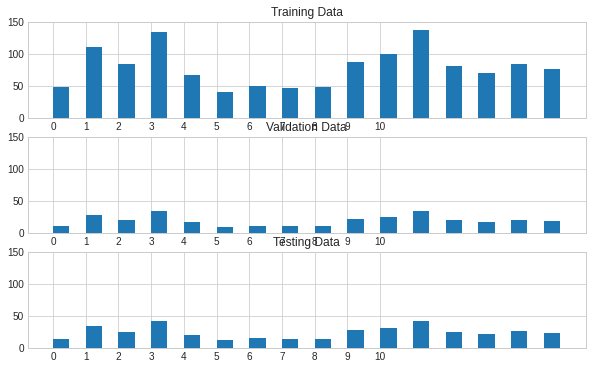

In [113]:
plt.figure(figsize=(10, 6))

plt.subplot(311)
plt.hist(train_y, bins=np.arange(0, 16, 0.5))
plt.ylim(0, 150)
plt.xticks(np.arange(0 , 11, 1))
plt.title('Training Data')

plt.subplot(312)
plt.hist(valid_y, bins=np.arange(0, 16, 0.5))
plt.ylim(0, 150)
plt.xticks(np.arange(0 , 11, 1))
plt.title('Validation Data')

plt.subplot(313)
plt.hist(test_y, bins=np.arange(0, 16, 0.5))
plt.ylim(0, 150)
plt.xticks(np.arange(0 , 11, 1))
plt.title('Testing Data')
plt.show()

>>>### 분류기 모형

In [114]:
"""분류기 모형 설정"""

"""DNN"""
'''Neural Network을 위한 딥러닝 모듈'''
import torch             # 딥러닝 모듈이고, 로컬에서는  설치필요
import copy
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

''' 결과 평가용 모듈 '''
from sklearn.metrics import accuracy_score, confusion_matrix
    
''' 기타 optional'''
import warnings, itertools
warnings.filterwarnings(action='ignore')


#https://colab.research.google.com/drive/1kt8Zmy-qiE4mhcgBrFUAzdBmVh9UVyGK#scrollTo=1ed897f1
train_x_torch = torch.FloatTensor(train_x.values) # torch.FloatTensor(numpy)
train_y_torch = torch.LongTensor(train_y.values) # torch.LongTensor(numpy)
trainDataset = torch.utils.data.TensorDataset(train_x_torch, train_y_torch)
trainLoader = torch.utils.data.DataLoader(dataset = trainDataset,
                                         batch_size = 100,
                                         shuffle = True)

# 검증에는 shuffle 하지 않음.  w 찾는게 아님.
valid_x_torch = torch.FloatTensor(valid_x.values) # torch.FloatTensor(numpy)
valid_y_torch = torch.LongTensor(valid_y.values) # torch.LongTensor(numpy)
validDataset = torch.utils.data.TensorDataset(valid_x_torch, valid_y_torch)
validLoader = torch.utils.data.DataLoader(dataset = validDataset,
                                        batch_size = 100,
                                        shuffle = False)

test_x_torch = torch.FloatTensor(test_x.values) # torch.FloatTensor(numpy)
test_y_torch = torch.LongTensor(test_y.values) # torch.LongTensor(numpy)
testDataset = torch.utils.data.TensorDataset(test_x_torch, test_y_torch)
testLoader = torch.utils.data.DataLoader(dataset = testDataset,
                                        batch_size = 100,
                                        shuffle = False)

In [115]:
# 모형
class DNNClassifier(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):    # 모델 구조 정의
        # input_dim = 784, output_dim = 10 (클래스 개수)
        super().__init__()
        
        ''' 모델 구조 만들기'''
        # CNN, RNN, LSTM등은 linear가 아니다.
        self.linear1 = torch.nn.Linear(input_dim, hidden_dim1) # input_dim(784) -> hidden_dim1(500)
        self.linear2 = torch.nn.Linear(hidden_dim1, hidden_dim2) # hidden_dim1(500) -> hidden_dim2(300)
        self.linear3 = torch.nn.Linear(hidden_dim2, hidden_dim3) # hidden_dim2(300) -> hidden_dim3(100)
        self.linear4 = torch.nn.Linear(hidden_dim3, output_dim) # hidden_dim3(100) -> output_dim(10)
        
        self.relu = torch.nn.ReLU() # Relu activation function
        self.dropout = torch.nn.Dropout(p=0.5)     # p = 0.5는 확률개념으로 50% 는 w 를 업데이트 하지 않음. overfit 방지
        
    def forward(self, x):                                                                # 순서, Sequence 정의
        
        ''' 짜여진 모델에 설명 변수 데이터 x를 입력할 때 진행할 순서 설정'''

        x = self.linear1(x) 
        x = self.relu(x) 
        x = self.linear2(x)
        x = self.relu(x)
        x = self.dropout(x)     # 반절만 활성화
        x = self.linear3(x)
        x = self.relu(x)
        output = self.linear4(x) 
        
        return output

In [116]:
#모델 및 비용함수, Solver 설정
print(train_x.shape[1],train_y.nunique())

52 16


In [117]:
# 빈 모델 생성
clf_DNN = DNNClassifier(train_x.shape[1], 500, 300, 100, train_y.nunique())  # features개수, Hidden Layer1, Hidden Layer2, Hidden Layer3, class 개수

In [118]:
# 비용함수 정의
criterion = torch.nn.CrossEntropyLoss()

# Solver 설정
# 경사하강법의 종류 정의 (adam)
solver = torch.optim.Adam(clf_DNN.parameters(), lr = 0.001)

>>>### 훈련 / 검증

In [119]:
num_epochs = 100

print("Start Training !")
print('-'*50)

# 빈 공간 할당
train_loss_total = []
valid_loss_total = []
best_loss = np.inf


# 
for epoch in range(num_epochs):
    #초기값  
    train_loss = 0
    valid_loss = 0
    
    ''' Training '''
    clf_DNN.train()
    for x_data, y_data in trainLoader:          # trainLoader로 구성해놨던 데이터 가져옴.
        
        # 정확한 학습을 위하여 모든 기울기 값을 0으로 설정
        solver.zero_grad()
        
        y_pred = clf_DNN(x_data)
        
        # 비용함수를 활용하여 오차 계산
        loss = criterion(y_pred, y_data)
        
        # 계산된 오차를 기반으로, 오차를 줄일 수 있는 방향으로 w값 업데이트  (즉, backpropagation !)
        loss.backward()
        solver.step() # forward evaluation, backward propagation, update를 모두 포함하는 step

        train_loss += loss.item()
    
    ''' Validation '''
    clf_DNN.eval()
    for eval_x_data, eval_y_data in validLoader:
        eval_y_pred = clf_DNN(eval_x_data)
        valid_loss += criterion(eval_y_pred, eval_y_data).item() # 딕셔너리에 있는 키와 값들의 쌍을 얻어 저장



    """ 결과출력"""    
    print('[%d epoch] Train loss : %.3f, Valid loss : %.3f' % (epoch+1, train_loss/len(trainLoader), valid_loss/len(validLoader)))
    
    if valid_loss/len(validLoader) < best_loss:
        # 로스값 업데이트
        best_loss = valid_loss/len(validLoader)        # validation loss 값이 점점줄다가 다시커지게 되므로 가장적었을때의 epoch와 파라미터 w를 기억해둔다.
        # 최적의 epoch 수와 모델 저장하기
        best_epoch = epoch
        best_model = clf_DNN.state_dict()
    
    train_loss_total.append(train_loss/len(trainLoader))
    valid_loss_total.append(valid_loss/len(validLoader))
    
print('-'*50)
print("Finished Training ! Best Epoch is epoch %d." % (best_epoch+1))

Start Training !
--------------------------------------------------
[1 epoch] Train loss : 2.565, Valid loss : 2.049
[2 epoch] Train loss : 1.704, Valid loss : 1.088
[3 epoch] Train loss : 0.941, Valid loss : 0.588
[4 epoch] Train loss : 0.547, Valid loss : 0.423
[5 epoch] Train loss : 0.372, Valid loss : 0.336
[6 epoch] Train loss : 0.261, Valid loss : 0.308
[7 epoch] Train loss : 0.178, Valid loss : 0.207
[8 epoch] Train loss : 0.135, Valid loss : 0.185
[9 epoch] Train loss : 0.104, Valid loss : 0.151
[10 epoch] Train loss : 0.087, Valid loss : 0.124
[11 epoch] Train loss : 0.068, Valid loss : 0.143
[12 epoch] Train loss : 0.058, Valid loss : 0.125
[13 epoch] Train loss : 0.057, Valid loss : 0.104
[14 epoch] Train loss : 0.046, Valid loss : 0.125
[15 epoch] Train loss : 0.044, Valid loss : 0.154
[16 epoch] Train loss : 0.035, Valid loss : 0.110
[17 epoch] Train loss : 0.027, Valid loss : 0.098
[18 epoch] Train loss : 0.021, Valid loss : 0.109
[19 epoch] Train loss : 0.019, Valid loss

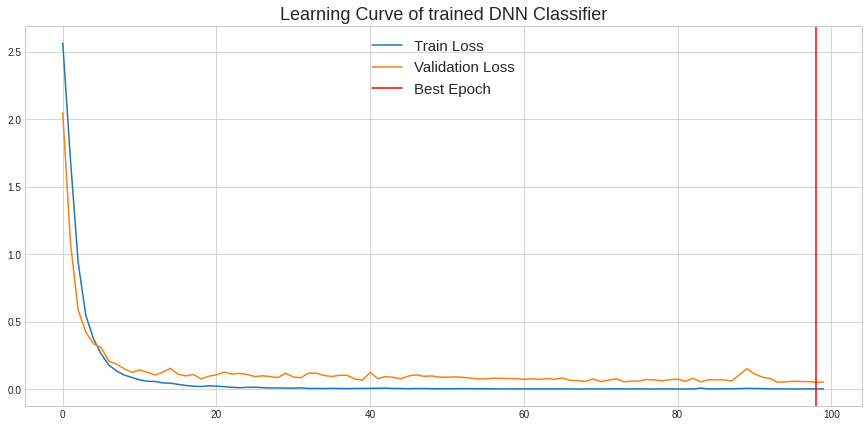

In [120]:
# learning Curve
plt.figure(figsize=(15,7))

# 학습 및 검증 로스 변동 관찰하기
plt.plot(train_loss_total,label='Train Loss')
plt.plot(valid_loss_total, label='Validation Loss')
# 최적의 모델이 저장된 곳 표시
plt.axvline(x = best_epoch, color='red', label='Best Epoch')    # axv 는 수직선 그리기
plt.legend(fontsize=15)
plt.title("Learning Curve of trained DNN Classifier", fontsize=18)
plt.show()

# 빨간선왼쪽, underfit, 오르쪽은 overfit
# 주관적으로 약간 왼쪽 또는 오른쪽으로 볼수 있음.

In [121]:
"""1차 평가 /w test_set"""
# DNN 성능평가
# 최적의 모델 불러오기
best_clf_DNN = DNNClassifier(train_x.shape[1], 500, 300, 100, 16)
best_clf_DNN.load_state_dict(best_model)

<All keys matched successfully>

In [122]:
# model을 evaluation 모드로 변경
best_clf_DNN.eval()

DNNClassifier(
  (linear1): Linear(in_features=52, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=100, bias=True)
  (linear4): Linear(in_features=100, out_features=16, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

In [123]:
# clf_mlp(data) == data -> logit -> probability=softmax(logit)
y_train_prob = best_clf_DNN(train_x_torch).softmax(dim=1)

# 가장 큰 확률값에 해당하는 범주를 예측 범주로 저장
y_train_pred = y_train_prob.max(1)[1].numpy()

In [124]:
y_train_prob[0].detach().numpy().tolist()

[1.0501621273972805e-11,
 1.3267747373606839e-30,
 2.384995761489344e-27,
 2.9471528841494565e-14,
 3.163471973266496e-08,
 0.00018173950957134366,
 5.6216598216807245e-12,
 2.5355300236511776e-15,
 1.8494890926394798e-20,
 6.1228711306369285e-18,
 4.0408661659829814e-12,
 1.1604045062063329e-20,
 8.06483106060879e-19,
 5.911619718051986e-12,
 3.373435447429074e-06,
 0.9998149275779724]

In [125]:
y_train_pred[0]

15

In [126]:
train_y.head(1)

1319    15
dtype: int64

In [127]:
train_accuracy = accuracy_score(y_pred=y_train_pred,y_true=train_y)

print(f"훈련 데이터셋 정확도: {train_accuracy:.3f}")

훈련 데이터셋 정확도: 1.000


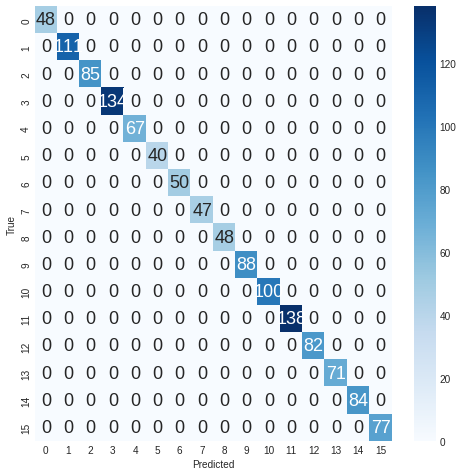

In [128]:
cm_train = confusion_matrix(y_true=train_y, y_pred=y_train_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [129]:
"""학습된 DNN Classifier 결과 확인 및 성능 평가 : Validation Data"""
y_valid_prob = best_clf_DNN(valid_x_torch).softmax(dim=1)
y_valid_pred = y_valid_prob.max(1)[1].numpy()
valid_accuracy = accuracy_score(y_pred=y_valid_pred,y_true=valid_y)

print(f"검증용 데이터셋 정확도: {valid_accuracy:.3f}")


검증용 데이터셋 정확도: 0.981


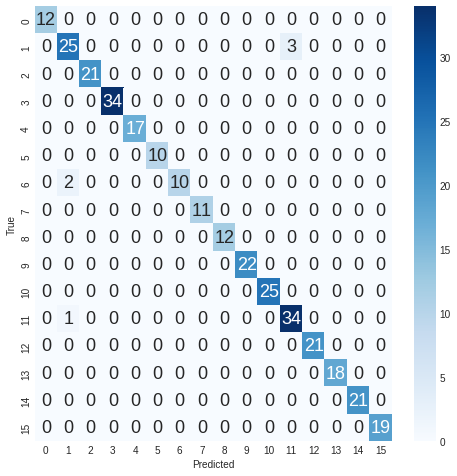

In [130]:
cm_valid = confusion_matrix(y_true=valid_y, y_pred=y_valid_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(data=cm_valid, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [131]:
"""성능평가 : Testing Data"""
y_test_prob = best_clf_DNN(test_x_torch).softmax(dim=1)
y_test_pred = y_test_prob.max(1)[1].numpy()
test_accuracy = accuracy_score(y_pred=y_test_pred,y_true=test_y)

print(f"테스트용 데이터셋 정확도: {test_accuracy:.3f}")

테스트용 데이터셋 정확도: 0.980


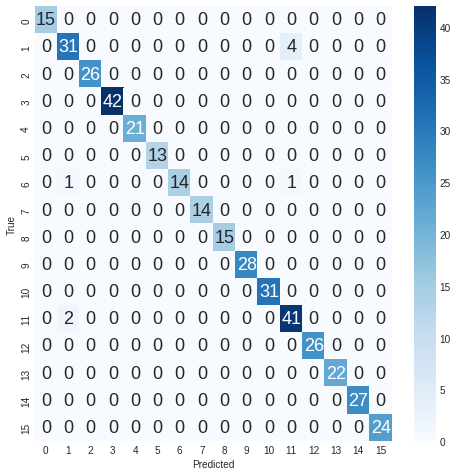

In [132]:
cm_test = confusion_matrix(y_true=test_y, y_pred=y_test_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

>>## MLP
- <b>activation</b> - activation function 타입 (identity, logistic, tanh, <font color='red'>relu</font>) <br>
- <b>batch_size</b> - stochastic optimizer가 사용할 minibatch 크기 <br>
- <b>max_iter  </b> - stochastic optimizer의 최대 iteration 횟수 ( = Epochs )<br>
- <b>alpha     </b> - Learning Rate (과적합 방지용) <br>
- <b>solver    </b> - 경사하강법의 종류 (<font color='red'>adam</font>, sgd, lbfgs) <br>

-- lbfgs: L-BFGS 준-뉴턴 방식 의 최적화 알고리즘으로, 제한된 컴퓨터 메모리를 이용하여 기존 BFGS 알고리즘을 속도면에서 개선한 알고리즘

In [140]:
''' Neural Network Classifier(분류기) 모듈 '''
from sklearn.neural_network import MLPClassifier    # MultiLayerPerceptrion

''' 결과 평가용 모듈 '''
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score   # 분류
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error       # 예측

>>>### 분류기 모형

In [200]:
"""분류기 모형 설정"""
clf_mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size=10,        # 몇 개의 data를 보고 학습할 것인지. batch_size
                        hidden_layer_sizes=(32), max_iter=500,                 
                        solver='adam', verbose = True, random_state = 2022)

>>>### 훈련 / 검증

In [201]:
"""학습"""
clf_mlp.fit(train_x, train_y)

Iteration 1, loss = 2.47007596
Iteration 2, loss = 1.56903314
Iteration 3, loss = 1.07054382
Iteration 4, loss = 0.74915166
Iteration 5, loss = 0.55292941
Iteration 6, loss = 0.42311795
Iteration 7, loss = 0.33529976
Iteration 8, loss = 0.27251549
Iteration 9, loss = 0.22598922
Iteration 10, loss = 0.19026734
Iteration 11, loss = 0.16382733
Iteration 12, loss = 0.14099344
Iteration 13, loss = 0.12243353
Iteration 14, loss = 0.10782186
Iteration 15, loss = 0.09515992
Iteration 16, loss = 0.08432310
Iteration 17, loss = 0.07601202
Iteration 18, loss = 0.06770894
Iteration 19, loss = 0.06108521
Iteration 20, loss = 0.05533096
Iteration 21, loss = 0.05000596
Iteration 22, loss = 0.04441631
Iteration 23, loss = 0.04142136
Iteration 24, loss = 0.03759026
Iteration 25, loss = 0.03448064
Iteration 26, loss = 0.03132375
Iteration 27, loss = 0.02890387
Iteration 28, loss = 0.02694846
Iteration 29, loss = 0.02417174
Iteration 30, loss = 0.02240882
Iteration 31, loss = 0.02066659
Iteration 32, los

MLPClassifier(batch_size=10, hidden_layer_sizes=32, max_iter=500,
              random_state=2022, verbose=True)

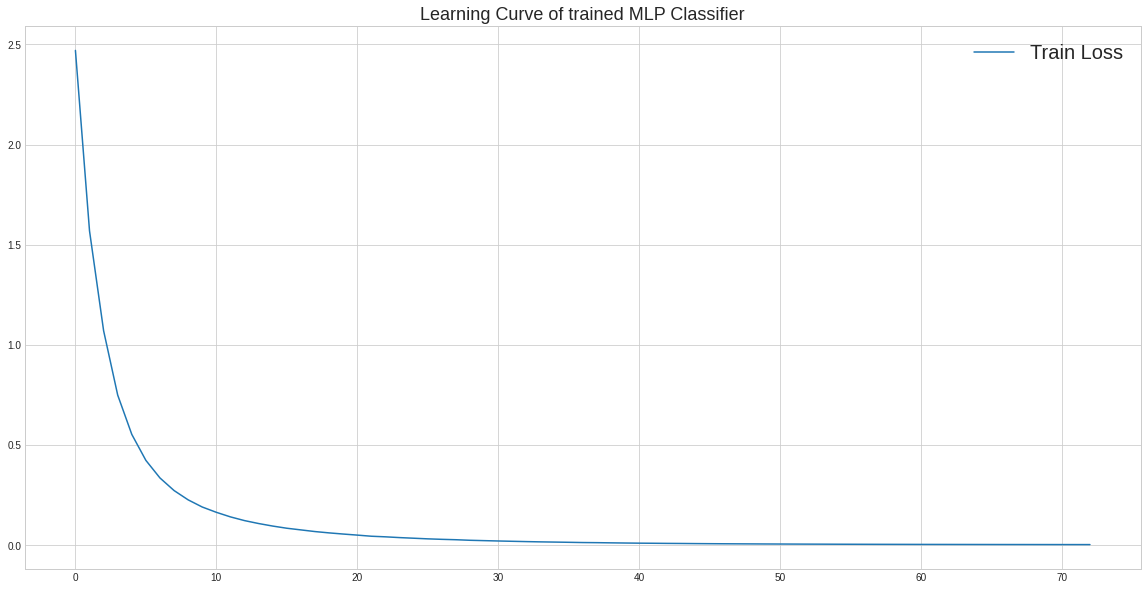

In [202]:
"""1차 평가 /w training_set"""
plt.figure(figsize=(20,10))

train_loss_values = clf_mlp.loss_curve_
plt.plot(train_loss_values,label='Train Loss')

plt.legend(fontsize=20)
plt.title("Learning Curve of trained MLP Classifier", fontsize=18)
plt.show()

In [203]:
train_y_pred = clf_mlp.predict(train_x)

In [204]:
cm_train = confusion_matrix (y_true=train_y, y_pred=train_y_pred)

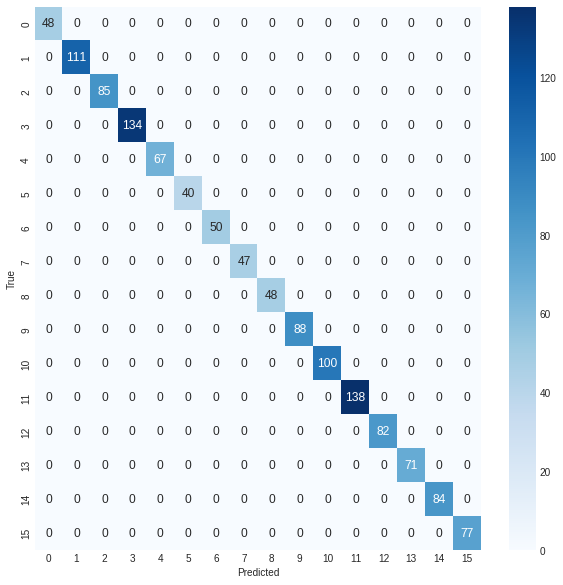

In [205]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 12}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

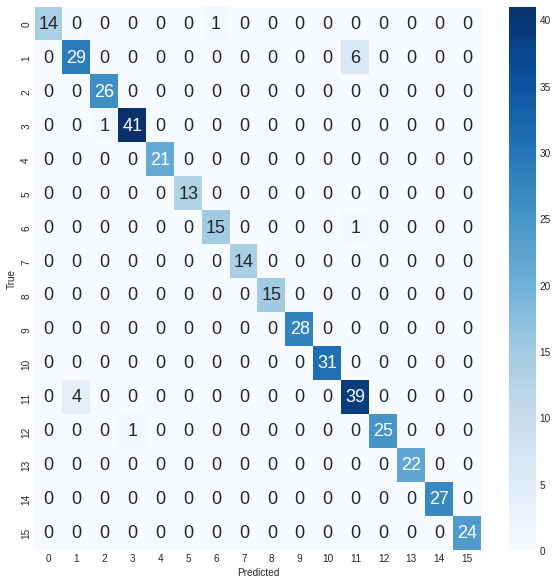

In [206]:
"""2차 평가 /w testing_set"""
test_y_pred = clf_mlp.predict(test_x)

cm_test = confusion_matrix(y_true=test_y, y_pred=test_y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [207]:
test_y_pred_proba = clf_mlp.predict_proba(test_x)
test_y_pred_proba = pd.DataFrame(test_y_pred_proba)
test_y_pred_proba.index = test_y.index.copy()

In [208]:
test_results = pd.concat([test_y_pred_proba, test_y], axis=1)
test_results.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
#test_results.head()

In [209]:
print("정확도 : {:.3f}".format(accuracy_score(test_y,test_y_pred)))
print("오차 행렬 \n",confusion_matrix(test_y,test_y_pred))

print(classification_report(test_y,test_y_pred))

정확도 : 0.965
오차 행렬 
 [[14  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 31  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0 39  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.88      0.83      0.85        35


>>## Decision Tree
- 최적의 max_depth를 선택해야 함
- Validation을 사용하여 accuracy, F1-Score를 고려하여 선정

In [212]:
"""라이브러리 모형 설정"""

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix     # f1_score 는 극단적 데이터 불균형이 있을경우에 살펴봐야 함.
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [249]:
max_depths = list(range(1, 20)) + [None]
print(max_depths)

# 평가 지표 저장
acc_valid = []
f1_valid = []

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, None]


>>>### 분류기 모형 / 훈련

In [250]:
"""1차 평가 /w training set"""
for max_depth in max_depths:
                      
    # 모델 학습
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(train_x, train_y)
    
    # validation 예측
    y_valid_pred = model.predict(valid_x)
    
    # 모델 평가 결과 저장
    acc = accuracy_score(valid_y, y_valid_pred)
    #f1 = f1_score(valid_y, y_valid_pred,average='macro')
    
    acc_valid.append(acc)   # 덮어씌워지므로 apped
    #f1_valid.append(f1)     # append

In [251]:
# Decision Tree depth list
xticks = list(map(str, max_depths))     # 스트링을 그래프의 문자열로 사용하려면.
print(xticks)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 'None']


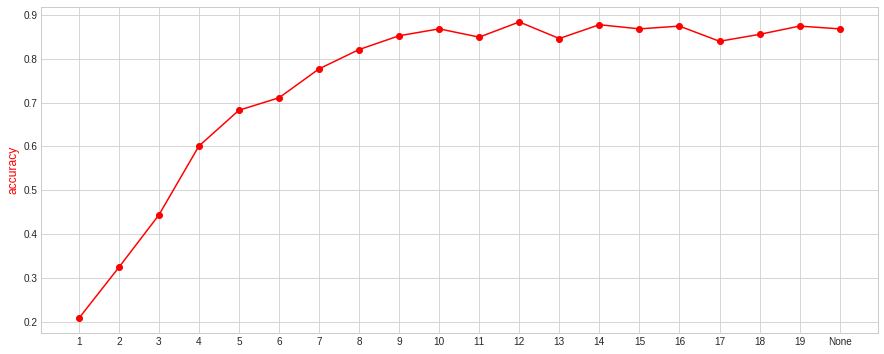

In [253]:
# Decision Tree depth에 따른 accuracy
fig, ax = plt.subplots(figsize=(15, 6))
#fig.subplots_adjust(right=0.75)

ax.plot(range(len(max_depths)), acc_valid, color='red', marker='o')
ax.set_ylabel('accuracy', color='red', fontsize=12)

# ax2 = ax.twinx()
# ax2.plot(range(len(max_depths)), f1_valid, color='blue', marker='s')
# ax2.set_ylabel('f1', color='blue', fontsize=12)

plt.xticks(range(len(max_depths)), xticks)
plt.show()

In [261]:
model = DecisionTreeClassifier(max_depth=8)
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=8)

>>>### 검증

In [262]:
"""1차 평가 /w test_set"""
y_test_pred = model.predict(test_x)

# Confusion Matrix
cm = confusion_matrix(test_y, y_test_pred)
cm = pd.DataFrame(cm)

# Accuracy, F1-Score
acc = accuracy_score(test_y, y_test_pred)
f1 = f1_score(test_y, y_test_pred, average='macro')

print('- Accuracy (Test) : {:.3}'.format(acc))
print('- F1 score (Test) : {:.3}'.format(f1))

- Accuracy (Test) : 0.822
- F1 score (Test) : 0.815


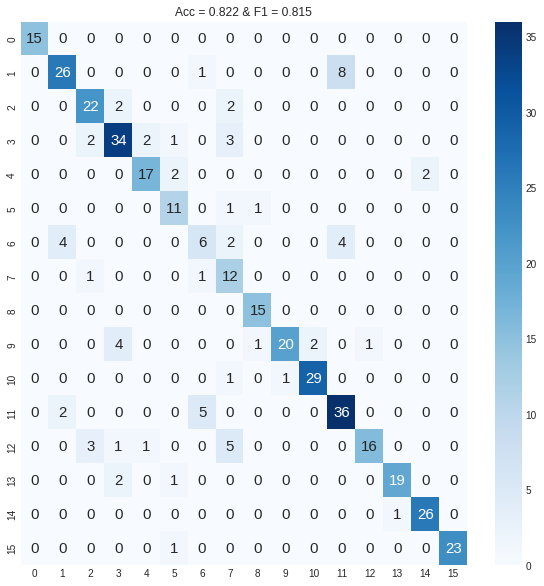

In [263]:
# 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(data=cm, annot=True, annot_kws={'size': 15}, fmt='d', cmap='Blues')
plt.title('Acc = {:.3f} & F1 = {:.3f}'.format(acc, f1))
plt.show()

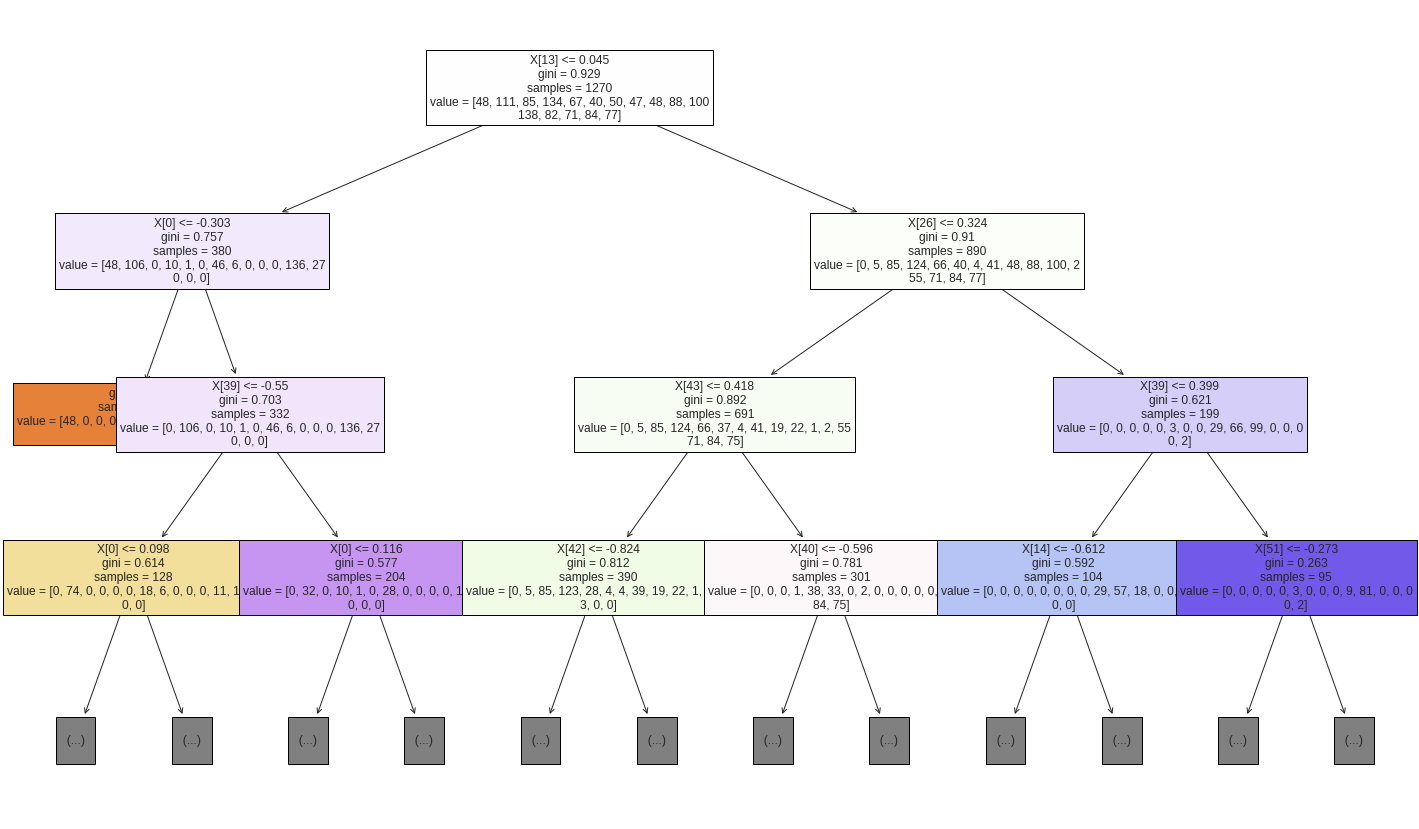

In [270]:
plt.figure(figsize=(25, 15))
plot_tree(decision_tree=model,max_depth=3,feature_names=None,label='all', filled=True,fontsize=12)
plt.show()
# Samples = 3  샘플의 개수
# Values = [2,1]     색상

In [271]:
# 변수 중요도
importances = model.feature_importances_

# 내림차순으로 정렬하기 위한 index
index = np.argsort(importances)[::-1]

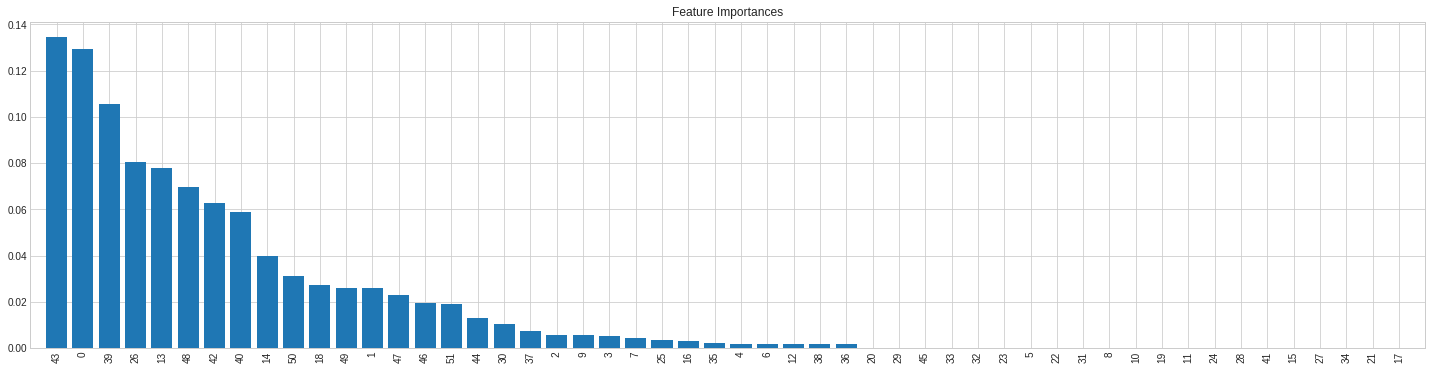

In [276]:
plt.figure(figsize=(25, 6))
plt.title('Feature Importances')
plt.bar(range(x.shape[1]),
        importances[index],
        align='center')
plt.xticks(range(x.shape[1]), x.columns[index], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

>>## KNN
grid search의 대상이 되는 파라미터
- n_neighbors: 근접이웃 개수
- weights: weight for voting
- metric: 거리 계산 방법

In [278]:
""" 모델 생성, 학습, 평가 """
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix    # 평가법은 acc,f1,confusion matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import VALID_METRICS
from sklearn.metrics import SCORERS

# parameter grid 지정                 5-fold / 10-fold 주로 사용
# dictioanry 안의 list 형태로 넣어서 구성

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['cosine', 'euclidean', 'manhattan']
}

>>>### 분류기 모형 / 훈련

In [279]:
""" Grid Search CV 모델 구성: cv = 10 """

SCORERS.keys()
model = KNeighborsClassifier()
model_cv = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)  # 모든것을 고려하겠다...

                        
model_cv.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['cosine', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [281]:
results = model_cv.cv_results_
params = results['params']
mean_score = results['mean_test_score']
std_score =results['std_test_score']

In [282]:
params = ['_'.join(str(x) for x in param.values()) for param in params]
params[:5]

['cosine_1_uniform',
 'cosine_1_distance',
 'cosine_3_uniform',
 'cosine_3_distance',
 'cosine_5_uniform']

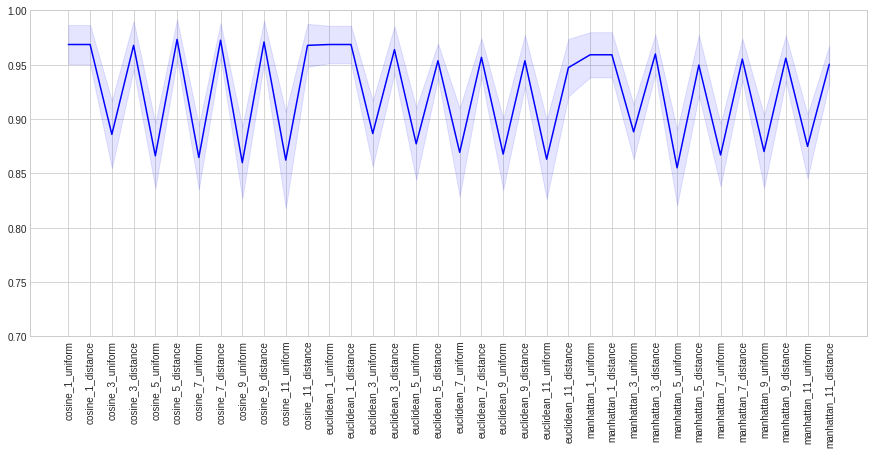

In [283]:
plt.figure(figsize=(15, 6))
plt.fill_between(range(len(params)), mean_score - std_score, mean_score + std_score, alpha=0.1, color='blue')
plt.plot(range(len(params)), mean_score, color='blue')
plt.ylim([0.7, 1.0])
plt.xticks(range(len(params)), params, rotation=90)
plt.show()

# 

In [284]:
# Best parameter 출력
print('Best parameters (Grid Search) \n >> ', model_cv.best_params_)

Best parameters (Grid Search) 
 >>  {'metric': 'cosine', 'n_neighbors': 5, 'weights': 'distance'}


In [285]:
# Best 모델 찾기
model = model_cv.best_estimator_
model                                         # weight default와 같아서 안보임.

KNeighborsClassifier(metric='cosine', weights='distance')

>>>### 검증

In [288]:
# 에측 결과 산출
y_test_pred = model.predict(test_x)

# Confusion Matrix
cm = confusion_matrix(test_y, y_test_pred)
cm = pd.DataFrame(cm)

# Accuracy, F1-Score
acc = accuracy_score(test_y, y_test_pred)
f1 = f1_score(test_y, y_test_pred,average='macro')

print('- Accuracy (Test) : {:.3}'.format(acc))
print('- F1 score (Test) : {:.3}'.format(f1))

- Accuracy (Test) : 0.972
- F1 score (Test) : 0.976


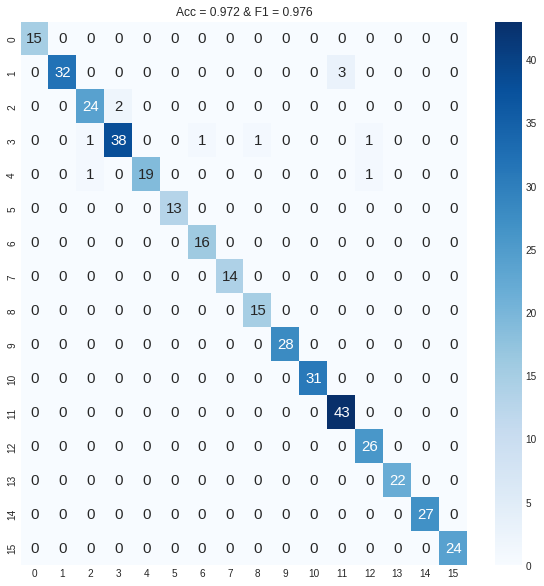

In [290]:
# 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(data=cm, annot=True, annot_kws={'size': 15}, fmt='d', cmap='Blues')
plt.title('Acc = {:.3f} & F1 = {:.3f}'.format(acc, f1))
plt.show()

# **결과**
---
>Data Augmentation 유/무, a모형별, 별도 검증 데이터 기반 Accuracy 비교

In [139]:
"""Data Augmentation 유/무, a모형별, 별도 검증 데이터 기반 Accuracy 비교"""

'Data Augmentation 유/무, a모형별, 별도 검증 데이터 기반 Accuracy 비교'